In [2]:
from sklearn.datasets import load_iris
iris= load_iris()
x= iris.data
col_naems= iris.feature_names
target_names= iris.target_names
print('Column names:', col_naems)
print('Target names:', target_names)

Column names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


# linear Regression

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)



In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


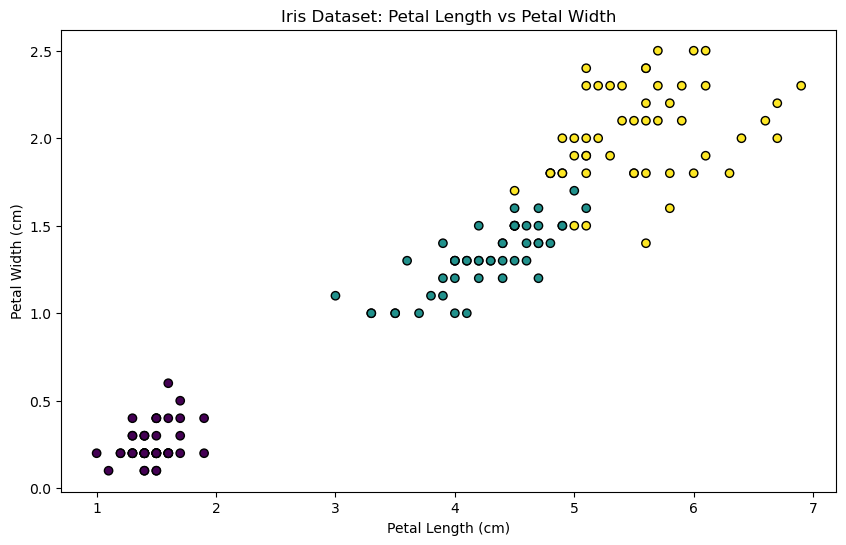

In [5]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(figsize=(10, 6))
ax.scatter(df['petal length (cm)'], df['petal width (cm)'], c=iris.target, cmap='viridis', edgecolor='k')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_title('Iris Dataset: Petal Length vs Petal Width')
plt.show()

In [6]:
print(df.corr())
print(df.describe())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          

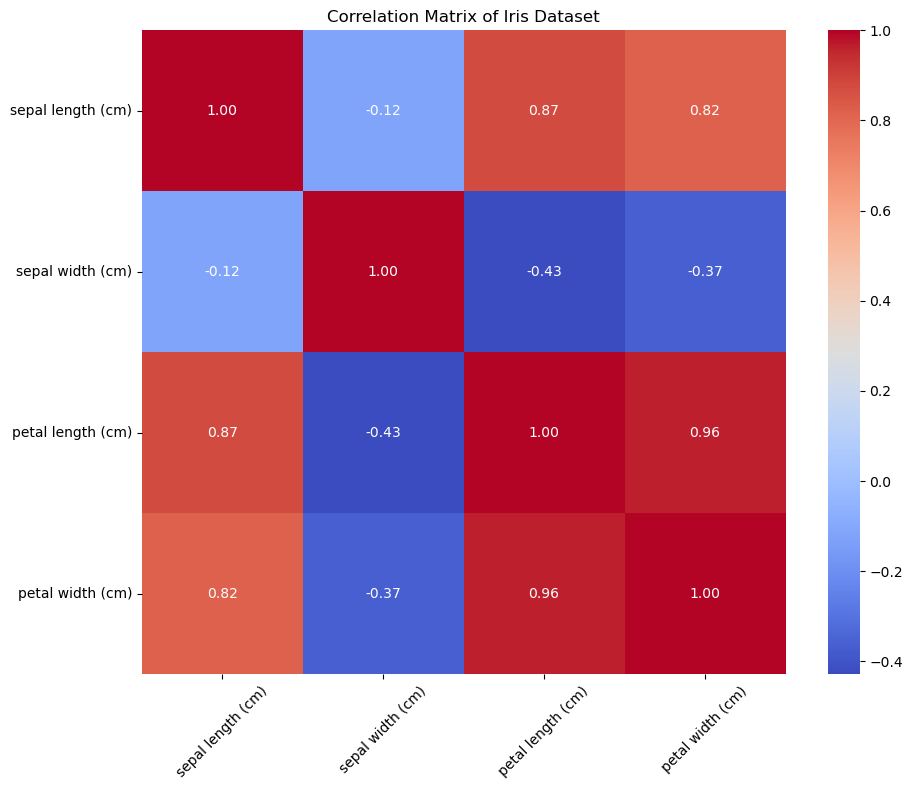

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Iris Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#  Why the .reshape(-1, 1)?
 y = df['petal width (cm)'].values.reshape(-1, 1)
X = df['petal length (cm)'].values.reshape(-1, 1)

Before reshape:

y.shape == (150,)

X.shape == (150,)

After reshape:

y.shape == (150, 1)

X.shape == (150, 1)

Here, -1 tells NumPy “figure out the correct number of rows for me,” and 1 makes it a single-column array. Now X is a proper feature matrix with 1 feature per sample, and y is a column vector.

In [14]:
#preprocessing
y=df['petal width (cm)'].values.reshape(-1, 1)
#reshaping y to be a 2D array
X=df['petal length (cm)'].values.reshape(-1, 1)
#reshaping x to be a 2D array
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (120, 1)
X_test shape: (30, 1)
y_train shape: (120, 1)
y_test shape: (30, 1)


# Train the model

# What “.fit(…)” Means
API: In scikit-learn, every estimator implements a .fit(X, y) method.

Purpose: .fit() “learns” the model parameters (in this case, the slope(s) and intercept of a straight line) that best map the inputs X to the target y.

Output: After .fit(), the model object stores the learned parameters in attributes like coef_ (coefficients) and intercept_.

In [15]:
from sklearn.linear_model import LinearRegression
reggressor = LinearRegression()
reggressor.fit(X_train, y_train)
# Train the model
print('Model trained successfully!')
print('Coefficients:', reggressor.coef_)
print('Intercept:', reggressor.intercept_)


Model trained successfully!
Coefficients: [[0.40942021]]
Intercept: [-0.34308543]


In [16]:
# prediction
score= reggressor.predict([[7.5]])
print('Predicted petal width for length 7.5 cm:', score[0][0])

Predicted petal width for length 7.5 cm: 2.7275661221038527


In [17]:
y_pred = reggressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df_pred)

    Actual  Predicted
0      0.2   0.311987
1      2.3   1.826842
2      0.2   0.230103
3      1.5   1.581190
4      0.2   0.271045
5      0.1   0.271045
6      2.3   2.154378
7      0.2   0.311987
8      1.2   1.294595
9      1.5   1.499306
10     1.4   1.458363
11     0.2   0.311987
12     0.2   0.230103
13     2.4   1.949668
14     0.2   0.311987
15     0.3   0.230103
16     1.9   1.826842
17     0.2   0.148219
18     0.4   0.189161
19     1.4   1.949668
20     1.5   1.499306
21     1.8   1.663074
22     0.2   0.230103
23     1.0   1.008001
24     0.4   0.311987
25     2.1   1.990610
26     1.3   1.417421
27     1.1   1.212711
28     2.5   2.113436
29     1.8   1.622132


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [19]:
x=np.arange(10).reshape(-1, 1)
y=np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print('x:', x)
print('y:', y)

x: [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y: [0 0 0 0 1 1 1 1 1 1]


In [20]:
model= LogisticRegression(solver='liblinear',C=10.0,random_state=0)
model.fit(x, y) 


LogisticRegression(C=10.0, random_state=0, solver='liblinear')